In [1]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler




data=pd.read_csv("/Users/Tara/Downloads/Global_Mobility_Report (1).csv")


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
data

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2356279,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-08-31,NaN,NaN,NaN,NaN,-1.0,NaN
2356280,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-09-01,NaN,NaN,NaN,NaN,-2.0,NaN
2356281,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-09-02,NaN,NaN,NaN,NaN,5.0,NaN
2356282,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-09-03,NaN,NaN,NaN,NaN,6.0,NaN


In [3]:
data=data[data.country_region=="United States"]

In [4]:
data.head

<bound method NDFrame.head of         country_region_code country_region sub_region_1   sub_region_2  \
1794395                  US  United States          NaN            NaN   
1794396                  US  United States          NaN            NaN   
1794397                  US  United States          NaN            NaN   
1794398                  US  United States          NaN            NaN   
1794399                  US  United States          NaN            NaN   
...                     ...            ...          ...            ...   
2332432                  US  United States      Wyoming  Weston County   
2332433                  US  United States      Wyoming  Weston County   
2332434                  US  United States      Wyoming  Weston County   
2332435                  US  United States      Wyoming  Weston County   
2332436                  US  United States      Wyoming  Weston County   

        metro_area iso_3166_2_code  census_fips_code        date  \
1794395      

In [5]:
data=data[data.date.astype(str).str.contains("2020-04")]
data

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1794441,US,United States,NaN,NaN,NaN,NaN,NaN,2020-04-01,-37.0,-11.0,-7.0,-48.0,-49.0,20.0
1794442,US,United States,NaN,NaN,NaN,NaN,NaN,2020-04-02,-40.0,-11.0,-9.0,-51.0,-50.0,21.0
1794443,US,United States,NaN,NaN,NaN,NaN,NaN,2020-04-03,-42.0,-12.0,-21.0,-51.0,-50.0,22.0
1794444,US,United States,NaN,NaN,NaN,NaN,NaN,2020-04-04,-48.0,-15.0,-24.0,-50.0,-37.0,15.0
1794445,US,United States,NaN,NaN,NaN,NaN,NaN,2020-04-05,-49.0,-20.0,-20.0,-54.0,-40.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2332341,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-04-24,NaN,NaN,NaN,NaN,-29.0,NaN
2332342,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-04-27,NaN,NaN,NaN,NaN,-35.0,NaN
2332343,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-04-28,NaN,NaN,NaN,NaN,-38.0,NaN
2332344,US,United States,Wyoming,Weston County,NaN,NaN,56045.0,2020-04-29,NaN,NaN,NaN,NaN,-42.0,NaN


In [6]:
data=data[["country_region", "sub_region_1", "date", 'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]

In [7]:
data

,country_region,sub_region_1,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1794441,United States,NaN,2020-04-01,-37.0,-11.0,-48.0,-49.0,20.0
1794442,United States,NaN,2020-04-02,-40.0,-11.0,-51.0,-50.0,21.0
1794443,United States,NaN,2020-04-03,-42.0,-12.0,-51.0,-50.0,22.0
1794444,United States,NaN,2020-04-04,-48.0,-15.0,-50.0,-37.0,15.0
1794445,United States,NaN,2020-04-05,-49.0,-20.0,-54.0,-40.0,13.0
...,...,...,...,...,...,...,...,...
2332341,United States,Wyoming,2020-04-24,NaN,NaN,NaN,-29.0,NaN
2332342,United States,Wyoming,2020-04-27,NaN,NaN,NaN,-35.0,NaN
2332343,United States,Wyoming,2020-04-28,NaN,NaN,NaN,-38.0,NaN
2332344,United States,Wyoming,2020-04-29,NaN,NaN,NaN,-42.0,NaN


In [8]:
data.dropna(axis=0, how="any", inplace=True)

<ipython-input-8-a41fd17ba840>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(axis=0, how="any", inplace=True)


In [9]:
data

,country_region,sub_region_1,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1794644,United States,Alabama,2020-04-01,-25.0,5.0,-20.0,-39.0,14.0
1794645,United States,Alabama,2020-04-02,-32.0,3.0,-25.0,-39.0,16.0
1794646,United States,Alabama,2020-04-03,-29.0,12.0,-29.0,-40.0,16.0
1794647,United States,Alabama,2020-04-04,-41.0,8.0,-33.0,-26.0,11.0
1794648,United States,Alabama,2020-04-05,-50.0,-18.0,-40.0,-36.0,12.0
...,...,...,...,...,...,...,...,...
2331596,United States,Wyoming,2020-04-23,-27.0,3.0,10.0,-34.0,14.0
2331597,United States,Wyoming,2020-04-24,-23.0,9.0,38.0,-33.0,13.0
2331600,United States,Wyoming,2020-04-27,-18.0,12.0,1.0,-30.0,10.0
2331602,United States,Wyoming,2020-04-29,-13.0,12.0,17.0,-32.0,10.0


In [10]:
scaler=StandardScaler()
data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]=scaler.fit_transform(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]) 

data




<ipython-input-10-a17db85ee869>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]=scaler.fit_transform(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to

,country_region,sub_region_1,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1794644,United States,Alabama,2020-04-01,0.926096,1.414038,0.705307,0.508619,-0.581314
1794645,United States,Alabama,2020-04-02,0.409316,1.244713,0.460784,0.508619,-0.214494
1794646,United States,Alabama,2020-04-03,0.630793,2.006676,0.265165,0.404818,-0.214494
1794647,United States,Alabama,2020-04-04,-0.255117,1.668026,0.069547,1.858038,-1.131546
1794648,United States,Alabama,2020-04-05,-0.919549,-0.533202,-0.272785,0.820024,-0.948135
...,...,...,...,...,...,...,...,...
2331596,United States,Wyoming,2020-04-23,0.778445,1.244713,2.172446,1.027627,-0.581314
2331597,United States,Wyoming,2020-04-24,1.073748,1.752688,3.541775,1.131428,-0.764725
2331600,United States,Wyoming,2020-04-27,1.442877,2.006676,1.732304,1.442832,-1.314956
2331602,United States,Wyoming,2020-04-29,1.812006,2.006676,2.514778,1.235229,-1.314956


In [11]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
principal_components = pca.fit_transform(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]])
pca_data = pd.DataFrame(data = principal_components, columns = ['PC 1', 'PC 2', "PC 3", "PC 4"])
print(pca.explained_variance_ratio_)
print("0.98260139 of the variance in the data is represented by these 4 principle components")
pca_data



[0.63457502 0.19166359 0.09037698 0.0560882 ]
0.98260139 of the variance in the data is represented by these 4 principle components


,PC 1,PC 2,PC 3,PC 4
0,-1.828957,-0.621101,0.390691,0.233721
1,-1.246429,-0.491666,0.421023,0.490210
2,-1.533568,-0.952083,1.008102,0.655105
3,-1.975854,0.837162,1.155200,1.201134
4,-0.031769,1.613107,0.031896,0.411420
...,...,...,...,...
22907,-2.579855,-0.566035,-0.855371,0.708931
22908,-3.666134,-1.090948,-1.640939,1.135860
22909,-3.531515,-0.464417,0.093111,0.473711
22910,-3.953306,-0.891774,-0.539171,0.390048


In [12]:
# factor loadings are correlations of features and components- trying to find the latent factors

loadings = pd.DataFrame( pca.components_, columns=["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]).T
loadings


,0,1,2,3
retail_and_recreation_percent_change_from_baseline,-0.463777,-0.376942,0.081857,-0.797409
grocery_and_pharmacy_percent_change_from_baseline,-0.418845,-0.486327,0.552206,0.529015
transit_stations_percent_change_from_baseline,-0.443075,-0.234707,-0.816959,0.284447
workplaces_percent_change_from_baseline,-0.462891,0.503675,0.111984,0.057269
residential_percent_change_from_baseline,0.445978,-0.559129,-0.091676,0.009633


In [13]:
print("'loadings' are also eigenvectors")
print("Greatest contributors to PC1: residential")
print("Greatest contributors to PC2: workplace")
print("Greatest contributor to PC3: grocery")
print("Greatest contributors to PC4: grocery")

# https://scentellegher.github.io/machine-learning/2020/01/27/pca-loadings-sklearn.html
# could also do color matrix https://towardsdatascience.com/understand-your-data-with-principle-component-analysis-pca-and-discover-underlying-patterns-d6cadb020939

'loadings' are also eigenvectors
Greatest contributors to PC1: residential
Greatest contributors to PC2: workplace
Greatest contributor to PC3: grocery
Greatest contributors to PC4: grocery


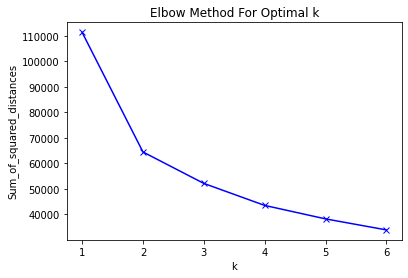

In [14]:
# find OPTIMAL value for kmeans
from sklearn.cluster import KMeans
data_kmeans = pd.DataFrame(pca_data)
Sum_of_squared_distances = []
K = range(1,7)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pca_data)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()






In [15]:
print(type(data[["retail_and_recreation_percent_change_from_baseline", "grocery_and_pharmacy_percent_change_from_baseline", "transit_stations_percent_change_from_baseline", "workplaces_percent_change_from_baseline", "residential_percent_change_from_baseline"]]))

<class 'pandas.core.frame.DataFrame'>


In [16]:
# run KMeans
kmeans = KMeans(n_clusters=4)
y = kmeans.fit_predict(pca_data[['PC 1', 'PC 2', "PC 3", "PC 4"]])
pca_data['Cluster'] = y
# pca_data["State"]=data["sub_region_1"]
pca_data

,PC 1,PC 2,PC 3,PC 4,Cluster
0,-1.828957,-0.621101,0.390691,0.233721,1
1,-1.246429,-0.491666,0.421023,0.490210,1
2,-1.533568,-0.952083,1.008102,0.655105,1
3,-1.975854,0.837162,1.155200,1.201134,1
4,-0.031769,1.613107,0.031896,0.411420,3
...,...,...,...,...,...
22907,-2.579855,-0.566035,-0.855371,0.708931,1
22908,-3.666134,-1.090948,-1.640939,1.135860,1
22909,-3.531515,-0.464417,0.093111,0.473711,1
22910,-3.953306,-0.891774,-0.539171,0.390048,1


In [17]:
ls_to_append=[]
for index, row in data.iterrows():
    ls_to_append.append(row["sub_region_1"])

# ls_to_append


In [18]:
series_to_add_to_pca_data=pd.Series(ls_to_append)
pca_data["State"]=series_to_add_to_pca_data
pca_data


,PC 1,PC 2,PC 3,PC 4,Cluster,State
0,-1.828957,-0.621101,0.390691,0.233721,1,Alabama
1,-1.246429,-0.491666,0.421023,0.490210,1,Alabama
2,-1.533568,-0.952083,1.008102,0.655105,1,Alabama
3,-1.975854,0.837162,1.155200,1.201134,1,Alabama
4,-0.031769,1.613107,0.031896,0.411420,3,Alabama
...,...,...,...,...,...,...
22907,-2.579855,-0.566035,-0.855371,0.708931,1,Wyoming
22908,-3.666134,-1.090948,-1.640939,1.135860,1,Wyoming
22909,-3.531515,-0.464417,0.093111,0.473711,1,Wyoming
22910,-3.953306,-0.891774,-0.539171,0.390048,1,Wyoming


In [19]:
pca_data.Cluster.unique()

array([1, 3, 2, 0], dtype=int32)

In [20]:
c0={}
c1={}
c2={}
c3={}
c4={}
list_of_clusters=[c0,c1,c2,c3,c4]
for index, row in pca_data.iterrows():
    for i in range(0,5):
        if row["Cluster"]==i:
            if row["State"] in list_of_clusters[i]:
                list_of_clusters[i][row["State"]]+=1
            else:
                list_of_clusters[i][row["State"]]=1
                
                
print(list_of_clusters)

[{'Alabama': 7, 'Alaska': 1, 'Arizona': 2, 'Arkansas': 1, 'California': 306, 'Colorado': 151, 'Connecticut': 83, 'Delaware': 24, 'District of Columbia': 22, 'Florida': 212, 'Georgia': 73, 'Hawaii': 84, 'Idaho': 4, 'Illinois': 104, 'Indiana': 33, 'Iowa': 16, 'Kansas': 16, 'Kentucky': 11, 'Louisiana': 47, 'Maine': 31, 'Maryland': 206, 'Massachusetts': 198, 'Michigan': 306, 'Minnesota': 86, 'Mississippi': 2, 'Missouri': 39, 'Montana': 11, 'Nebraska': 2, 'Nevada': 34, 'New Hampshire': 36, 'New Jersey': 390, 'New Mexico': 3, 'New York': 446, 'North Carolina': 90, 'North Dakota': 5, 'Ohio': 58, 'Oregon': 60, 'Pennsylvania': 303, 'Rhode Island': 70, 'South Carolina': 8, 'South Dakota': 1, 'Tennessee': 31, 'Texas': 140, 'Utah': 4, 'Vermont': 61, 'Virginia': 173, 'Washington': 67, 'West Virginia': 19, 'Wisconsin': 57, 'Wyoming': 1}, {'Alabama': 319, 'Alaska': 20, 'Arizona': 122, 'Arkansas': 280, 'California': 258, 'Colorado': 73, 'Connecticut': 7, 'Delaware': 12, 'Florida': 174, 'Georgia': 293,

In [21]:
states_clusters={}
for index, row in pca_data.iterrows():
    if row["State"] not in states_clusters:
        state_dict={}
        for i in range(0,5):
            if row["State"] in list_of_clusters[i]:
                state_dict[i]=list_of_clusters[i][row["State"]]
#         print(state_dict)
        state_dict_vals=list(state_dict.values())
        state_dict_keys=list(state_dict.keys())
        state_vals_max=max(state_dict_vals)
        max_ind=state_dict_vals.index(state_vals_max)
        max_cluster=state_dict_keys[max_ind]
        states_clusters[row["State"]]=max_cluster
# print(states_clusters)
    

In [22]:
clusters_and_their_states={1:[], 2:[], 3:[], 4:[], 0:[]}

for i in states_clusters.keys():
    for j in range(0,5):
        if states_clusters[i]==j:
            clusters_and_their_states[j].append(i)


print(clusters_and_their_states)


{1: ['Alabama', 'Arizona', 'Arkansas', 'Idaho', 'Iowa', 'Kansas', 'Louisiana', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Mexico', 'North Carolina', 'Oklahoma', 'Oregon', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Wyoming'], 2: ['Alaska', 'Delaware', 'Georgia', 'Illinois', 'Indiana', 'Kentucky', 'Maine', 'Minnesota', 'New Hampshire', 'North Dakota', 'Ohio', 'Pennsylvania', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin'], 3: ['California', 'Florida'], 4: [], 0: ['Colorado', 'Connecticut', 'District of Columbia', 'Hawaii', 'Maryland', 'Massachusetts', 'Michigan', 'New Jersey', 'New York', 'Rhode Island', 'Vermont']}


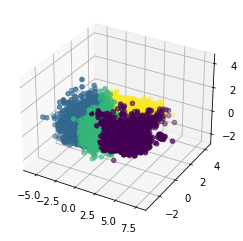

In [23]:
# 4d plot for april kmeans
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = pca_data["PC 1"]
y = pca_data["PC 2"]
z = pca_data["PC 3"]
z = pca_data["PC 4"]

categories = np.unique(pca_data["Cluster"])
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors))  
pca_data["Color"] = pca_data["Cluster"].apply(lambda x: colordict[x])

img=ax.scatter(x,y,z, c=pca_data.Color)


# fig.colorbar(img)
plt.show()


In [24]:
num=0
pca_2=pd.DataFrame(columns=['PC 1', 'PC 2', "PC 3", "PC 4", "Cluster", "State"])
for index, row in pca_data.iterrows():
    if num%50==0:
        pca_2=pca_2.append({"PC 1": row["PC 1"],"PC 2": row["PC 2"],"PC 3": row["PC 3"],"PC 4": row["PC 4"],"Cluster": row["Cluster"],"State": row["State"] }, ignore_index=True)
    num+=1
pca_2.head


<bound method NDFrame.head of          PC 1      PC 2      PC 3      PC 4 Cluster      State
0   -1.828957 -0.621101  0.390691  0.233721       1    Alabama
1   -1.088034  0.737813 -0.453996  0.097115       1    Alabama
2   -3.129177 -0.054437 -0.456475 -0.467775       1    Alabama
3   -3.329382  0.796199  0.158806 -0.241527       1    Alabama
4   -0.180702 -0.066816  0.126059  0.099895       2    Alabama
..        ...       ...       ...       ...     ...        ...
454  0.015601 -0.894998 -1.088136 -0.289909       2  Wisconsin
455  1.053624 -0.834547 -0.766630  0.405786       2  Wisconsin
456 -1.313474 -0.006023 -0.783932  0.279599       1    Wyoming
457 -2.012352  1.282097 -0.563768  0.381457       1    Wyoming
458 -1.628274  0.306631 -1.111951  0.458536       1    Wyoming

[459 rows x 6 columns]>

In [25]:
pca_2

,PC 1,PC 2,PC 3,PC 4,Cluster,State
0,-1.828957,-0.621101,0.390691,0.233721,1,Alabama
1,-1.088034,0.737813,-0.453996,0.097115,1,Alabama
2,-3.129177,-0.054437,-0.456475,-0.467775,1,Alabama
3,-3.329382,0.796199,0.158806,-0.241527,1,Alabama
4,-0.180702,-0.066816,0.126059,0.099895,2,Alabama
...,...,...,...,...,...,...
454,0.015601,-0.894998,-1.088136,-0.289909,2,Wisconsin
455,1.053624,-0.834547,-0.766630,0.405786,2,Wisconsin
456,-1.313474,-0.006023,-0.783932,0.279599,1,Wyoming
457,-2.012352,1.282097,-0.563768,0.381457,1,Wyoming


In [26]:
clusters_and_their_states.values()

dict_values([['Alabama', 'Arizona', 'Arkansas', 'Idaho', 'Iowa', 'Kansas', 'Louisiana', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Mexico', 'North Carolina', 'Oklahoma', 'Oregon', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Wyoming'], ['Alaska', 'Delaware', 'Georgia', 'Illinois', 'Indiana', 'Kentucky', 'Maine', 'Minnesota', 'New Hampshire', 'North Dakota', 'Ohio', 'Pennsylvania', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin'], ['California', 'Florida'], [], ['Colorado', 'Connecticut', 'District of Columbia', 'Hawaii', 'Maryland', 'Massachusetts', 'Michigan', 'New Jersey', 'New York', 'Rhode Island', 'Vermont']])

In [27]:
# vals=list(clusters_and_their_states.values())
# keys=list(clusters_and_their_states.keys())
# for index, row in pca_2.iterrows():
#     for i in range(len(vals)):
#         if row["State"] in vals[i]:
#             pca_2.at[index, "Cluster"]= keys[i]
# pca_2
            
            
    

In [28]:
# 5d plot for  kmeans




import plotly
import plotly.graph_objs as go

#Set marker properties
markercolor = pca_2["Cluster"]
markersize = (pca_2['PC 4']+5)*3

#Make Plotly figure
fig1 = go.Scatter3d(x=pca_2["PC 1"],
                    y=pca_2["PC 2"],
                    z=pca_2["PC 3"],
                    marker=dict(size=markersize,
                                color=markercolor,
                                opacity=0.9,
                                reversescale=True,colorscale='Rainbow'),
                    line=dict (width=0.02),
                    mode='markers', hovertemplate="%{text}" +"<br>PC1: %{x}"+"<br>PC2: %{y}"+ "<br>PC3: %{z}<br> PC4(not normalized): %{marker.size:,}",
                    text=pca_2.State)

#Make Plot.ly Layout
mylayout = go.Layout(scene=dict(xaxis=dict( title="Principal Component 1"),
                                yaxis=dict( title="Principal Component 2"),
                                zaxis=dict(title="Principal Component 3")),
                    )

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True, filename=("April Mobility KMeans.html")
                   )


'April Mobility KMeans.html'